
National Greenhouse Gas Emissions Inventories by the sector of origin and National Mitigation Targets as determined by the countries.

Annual country-level estimates of net emissions/removals for 215 countries are presented by six sectors, 14 sub-sectors and four gases, for the years 1970-2021. To facilitate retrieval and use, two aggregated indicators, Total GHG emissions including land-use, land-use change and forestry (LULUCF) and Total GHG emissions excluding land-use, land-use change and forestry are presented in addition to the sector-level information.[link text](https://climatedata.imf.org/datasets/72e94bc71f4441d29710a9bea4d35f1d_0/about)

**Problem Statement:**
*Greenhouse gases such as carbon dioxide, methane, and nitrous oxide trap heat in the Earth's atmosphere, leading to climate change and its associated impacts, such as sea level rise, more frequent and severe weather events, and changes in ecosystems and biodiversity.*

**Business Understanding**


*   Businesses can have a significant impact on greenhouse gas emissions through their operations, supply chains, and products.


*   Understanding Greenhouse gas emissions is critical for businesses to make informed decisions about sustainability, risk management, and long-term viability. 

*  Comprehensive understanding of the sources and impacts of emissions across the entire value chain, from raw material extraction to end-of-life disposal. 


*   Compliance with regulatory requirements to reduce emissions, such as carbon taxes or emissions trading schemes.


*  Reducing emissions can lead to cost savings, increased efficiency, and improved brand reputation. 








 



###National Greenhouse Gas Emissions Inventories and Implied National Mitigation (Nationally Determined Contributions) Targets

Exploratory Data Analysis


##1. Import Libraries

In [1]:
# import necessary libraries
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Reading the data

In [2]:
df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")

<ipython-input-2-746a6854eec9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")
Skipping line 1635: unexpected end of data


In [3]:
# Determining the shape of the datset
df.shape

(1633, 74)

3.Data Cleaning

In [4]:
# Cleaning the missing data
empty_columns=df.isnull().sum()
empty_columns=empty_columns[empty_columns.values>(0.3*len(empty_columns))]
# listing the null values columns having more than 30%
print(empty_columns)

ISO2      440
F1970     369
F1971     369
F1972     369
F1973     369
         ... 
F2026    1584
F2027    1584
F2028    1584
F2029    1584
F2030    1437
Length: 62, dtype: int64


In [5]:
# Searching for the column for null values
df.isnull().sum()/len(df)*100

ObjectId      0.000000
Country       0.000000
ISO2         26.944274
ISO3          0.000000
Indicator     0.000000
               ...    
F2026        96.999388
F2027        96.999388
F2028        96.999388
F2029        96.999388
F2030        87.997551
Length: 74, dtype: float64

If a column has a very high percentage of null values (e.g., more than 50%), and it is not critical to the analysis or prediction task, it may be appropriate to simply drop the column. Let's drop columns F2026,F2027,F2028,    F2029, F2030.               
        


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             1633 non-null   int64  
 1   Country              1633 non-null   object 
 2   ISO2                 1193 non-null   object 
 3   ISO3                 1633 non-null   object 
 4   Indicator            1633 non-null   object 
 5   Unit                 1633 non-null   object 
 6   Source               1633 non-null   object 
 7   CTS_Code             1633 non-null   object 
 8   CTS_Name             1633 non-null   object 
 9   CTS_Full_Descriptor  1633 non-null   object 
 10  Industry             1633 non-null   object 
 11  Gas_Type             1633 non-null   object 
 12  Scale                1633 non-null   object 
 13  F1970                1264 non-null   float64
 14  F1971                1264 non-null   float64
 15  F1972                1264 non-null   f

In [7]:
#Listing empty rows and removing rows greater than 30%
empty_rows=df.isnull().sum(axis=1)
empty_rows=list(empty_rows[empty_rows.values>=0.3*len(df)].index)
df.drop(labels=empty_rows,axis=0,inplace=True)
print(len(empty_rows))

0


Dropping ID,Source,Scale and Unit columns.


In [8]:
df.drop(['ObjectId','ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Full_Descriptor','Scale','F2022','F2023','F2024','F2025','F2026','F2027','F2028','F2028','F2029','F2030'],axis=1,inplace=True)

High number of missing values - drop columns F2022 - F2030. Deleted the columns having 628 missing values.

In [9]:
df.isna().sum()
df.isnull().sum()/len(df)*100

Country      0.000000
CTS_Name     0.000000
Industry     0.000000
Gas_Type     0.000000
F1970       22.596448
F1971       22.596448
F1972       22.596448
F1973       22.596448
F1974       22.596448
F1975       22.596448
F1976       22.596448
F1977       22.596448
F1978       22.596448
F1979       22.596448
F1980       22.596448
F1981       22.596448
F1982       22.596448
F1983       22.596448
F1984       22.596448
F1985       22.596448
F1986       22.596448
F1987       22.596448
F1988       22.596448
F1989       22.596448
F1990       13.288426
F1991       13.288426
F1992       13.288426
F1993       13.288426
F1994       13.288426
F1995       13.288426
F1996       13.288426
F1997       13.288426
F1998       13.288426
F1999       13.288426
F2000       13.288426
F2001       13.288426
F2002       13.288426
F2003       13.288426
F2004       13.288426
F2005       13.288426
F2006       13.288426
F2007       13.288426
F2008       13.288426
F2009       13.288426
F2010       13.288426
F2011     

4.Imputing missing data

In [10]:
##Imputing the missing values with mean of the population
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='0']
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    mean_value=df[feature].mean()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(mean_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()
df
                    

,Country,CTS_Name,Industry,Gas_Type,F1970,F1971,F1972,F1973,F1974,F1975,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
0,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Carbon dioxide,20.880609,20.901782,21.075596,21.496603,21.582896,22.278924,...,0,0,0,0,0,0,0,0,0,0
1,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Greenhouse gas,1033.088228,1040.842816,1047.925600,1060.981516,1079.694780,1106.317706,...,0,0,0,0,0,0,0,0,0,0
2,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Methane,682.429285,683.556828,687.644816,693.622138,715.108070,721.979982,...,0,0,0,0,0,0,0,0,0,0
3,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Nitrous oxide,329.778334,336.384206,339.205188,345.862775,343.003815,362.058800,...,0,0,0,0,0,0,0,0,0,0
4,Advanced Economies,Annual Net Emissions/Removals,Buildings and other Sectors,Carbon dioxide,1954.799942,1966.157204,2027.906735,2043.195965,1936.555406,1915.620128,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,Bangladesh,Annual Net Emissions/Removals,Agriculture,Carbon dioxide,0.162827,0.130302,0.212217,0.209099,0.134341,0.237228,...,0,0,0,0,0,0,0,0,0,0
1629,Bangladesh,Annual Net Emissions/Removals,Agriculture,Greenhouse gas,104.923143,98.781096,100.478650,100.774948,99.316825,103.490823,...,0,0,0,0,0,0,0,0,0,0
1630,Bangladesh,Annual Net Emissions/Removals,Agriculture,Methane,97.132367,91.131064,92.710179,92.992374,91.796763,95.277218,...,0,0,0,0,0,0,0,0,0,0
1631,Bangladesh,Annual Net Emissions/Removals,Agriculture,Nitrous oxide,7.627949,7.519730,7.556254,7.573475,7.385720,7.976377,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#No of countries involved
df['Country'].value_counts()

Advanced Economies                   118
Asia                                 110
Australia                            110
Americas                             110
Austria                              105
Africa                               102
Argentina                            100
Algeria                               97
Azerbaijan, Rep. of                   97
Albania                               95
Afghanistan, Islamic Rep. of          86
Angola                                86
Bahrain, Kingdom of                   79
Bahamas, The                          77
Armenia, Rep. of                      76
Aruba, Kingdom of the Netherlands     71
Antigua and Barbuda                   68
Anguilla                              41
Bangladesh                             5
Name: Country, dtype: int64

In [12]:
#No of industries involved
df['Industry'].value_counts()

Not Applicable                                    370
Industrial Processes and Product Use               81
Buildings and other Sectors                        73
Road Transportation                                72
Manufacturing Industries and Construction          72
Energy                                             72
Energy Industries                                  72
Fugitive Emissions from Fuels                      68
Agriculture                                        66
Domestic Aviation                                  64
Waste                                              64
Domestic Navigation                                60
Other Transportation                               60
Land-use, land-use change and forestry             59
Non-energy Products from Fuels and Solvent Use     54
Metal Industry                                     50
Chemical Industry                                  48
Other                                              45
Railways                    

In [13]:
#Count of Gas_typa acrros the globe
df['Gas_Type'].value_counts()

Greenhouse gas       393
Carbon dioxide       336
Nitrous oxide        321
Methane              293
Not Applicable       196
Fluorinated gases     94
Name: Gas_Type, dtype: int64

In [14]:
df.sort_values(['F2021'],ascending=False)[['Country','Gas_Type']]

,Country,Gas_Type
1152,Asia,Greenhouse gas
1157,Asia,Greenhouse gas
1139,Asia,Not Applicable
1140,Asia,Not Applicable
1150,Asia,Carbon dioxide
...,...,...
1200,Australia,Carbon dioxide
1091,Asia,Greenhouse gas
1090,Asia,Carbon dioxide
41,Advanced Economies,Greenhouse gas


In [15]:
df.groupby(['F2021']).max().sort_values(['F2021'],ascending=False)[['Country','Gas_Type','Industry']]

,Country,Gas_Type,Industry
F2021,,,
29481.796650,Asia,Greenhouse gas,Not Applicable
29339.720750,Asia,Greenhouse gas,Not Applicable
28911.572000,Asia,Not Applicable,Not Applicable
28740.575000,Asia,Not Applicable,Not Applicable
22334.749920,Asia,Carbon dioxide,Not Applicable
...,...,...,...
-56.621314,Australia,Carbon dioxide,"Land-use, land-use change and forestry"
-142.075904,Asia,Greenhouse gas,"Land-use, land-use change and forestry"
-189.655455,Asia,Carbon dioxide,"Land-use, land-use change and forestry"


In [16]:
#Locate the country with max gas emission
df.groupby(['Gas_Type']).max().sort_values(['Country','Industry','F2021'],ascending =False)

,Country,CTS_Name,Industry,F1970,F1971,F1972,F1973,F1974,F1975,F1976,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
Gas_Type,,,,,,,,,,,,,,,,,,,,,
Greenhouse gas,Bangladesh,Total GHG Emissions Including Land-Use and Lan...,Waste,12368.877930,12252.203380,12697.975640,13276.327560,13006.141990,12599.289910,13131.628540,...,1,1,1,1,1,1,1,1,1,1
Carbon dioxide,Bangladesh,Total GHG Emissions Including Land-Use and Lan...,Waste,9797.610763,9662.130568,10083.984100,10614.071550,10338.032620,9925.096823,10491.049290,...,1,1,1,1,1,1,1,1,1,1
Methane,Bangladesh,Total GHG Emissions Including Land-Use and Lan...,Waste,2742.822322,2777.002610,2797.598172,2875.117179,2879.289475,2937.408521,2930.685358,...,1,1,1,1,1,1,1,1,1,1
Nitrous oxide,Bangladesh,Total GHG Emissions Including Land-Use and Lan...,Waste,705.572623,713.936486,723.986834,746.531378,753.631892,750.894596,766.265472,...,1,1,1,1,1,1,1,1,1,1
Fluorinated gases,"Bahrain, Kingdom of",Total GHG Emissions Including Land-Use and Lan...,Product Uses as Substitutes for ODS,166.627052,165.762752,172.790518,181.261123,179.518181,176.979131,184.870522,...,1,1,1,1,1,1,1,1,1,1
Not Applicable,"Bahrain, Kingdom of",Total GHG Emissions Including Land-Use and Lan...,Not Applicable,166.627052,165.762752,172.790518,181.261123,179.518181,176.979131,184.870522,...,1,1,1,1,1,1,1,1,1,1


Insights
 

*   Globally, Greenhouse emission is the highest from the list for Zimbabwe for
industrial waste. 

*   Extreme temperatures and dry spells intensified the drought conditions , leading to enormous social and economic loss across multiple sectors (e.g. Agriculture, Water, Energy, Forestry).

*   Unsustainable agricultural activities, resources extraction and wild fires caused major threats to wetlands.



In [17]:
#Locate the country with min gas emission
df.groupby(['Gas_Type']).min().sort_values(['Country','Industry','F2021'],ascending =False)

,Country,CTS_Name,Industry,F1970,F1971,F1972,F1973,F1974,F1975,F1976,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
Gas_Type,,,,,,,,,,,,,,,,,,,,,
Not Applicable,Advanced Economies,CO2 Emissions; IMF Estimated 2030 GHG Emission...,Not Applicable,166.627052,165.762752,172.790518,181.261123,179.518181,176.979131,184.870522,...,1,1,1,1,1,1,1,0,0,0
Fluorinated gases,Advanced Economies,Annual Net Emissions/Removals,Chemical Industry,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
Methane,Advanced Economies,Annual Net Emissions/Removals,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
Nitrous oxide,Advanced Economies,Annual Net Emissions/Removals,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
Greenhouse gas,Advanced Economies,Annual Net Emissions/Removals,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
Carbon dioxide,Advanced Economies,Annual Net Emissions/Removals,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


Insights


*   Advanced economies adopts market-based strategies cap and trade and carbon tax to reduce emissions.
*  Use of Direct non-electricity fuel use in homes and industry. 

*   Reducing direct usage of fuels (e.g., natural gas) in homes, shops, factories, and offices. 

5.Univariate Analysis

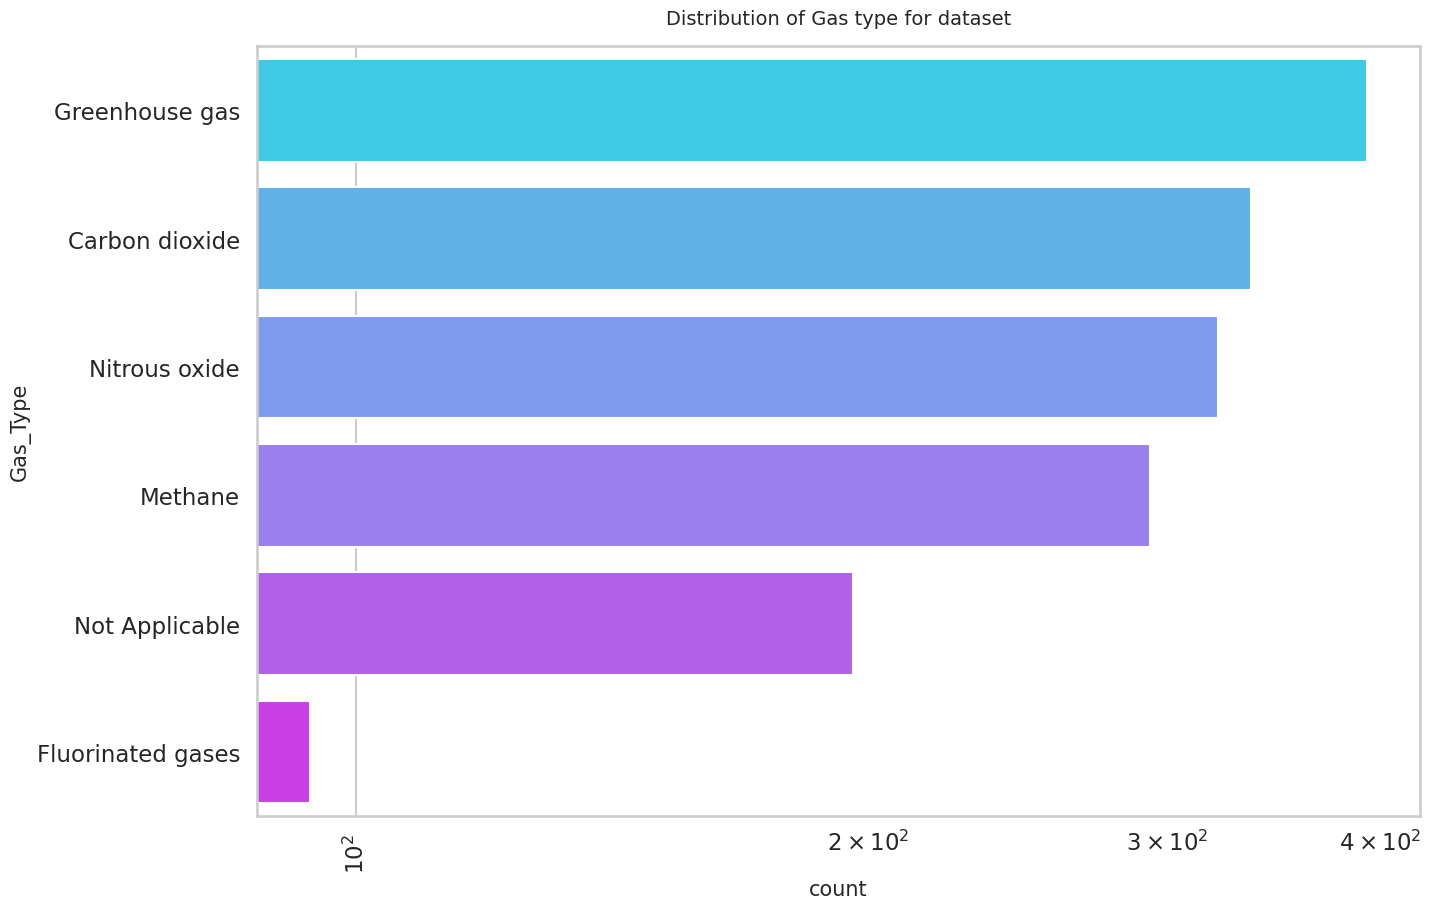

In [18]:
#Univariate analysis for categories
# Count plotting in logarithmic scale

# Plotting for gas distribution type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 16

plt.title("Distribution of Gas type for dataset")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df,y='Gas_Type',order=df['Gas_Type'].value_counts().index,palette='cool')

plt.show()

Data Insights
1. Increase in level of greenhouse gas indicating the  increased human activities such as the burning of fossil fuels, deforestation, and agriculture(> 10^3).
2.Carbon dioxide second most prevalent greenhouse gas and generated from the combustion of fossil fuels (coal, oil, and natural gas), deforestation, and other land-use changes, is a major contributor to climate change.
3.Nitrous oxide emitted from agricultural and industrial activities, as well as the combustion of fossil fuels and solid waste is the most contributor.

<Axes: title={'center': 'Distribution of Industry type for year 2021'}, xlabel='F2021', ylabel='Industry'>

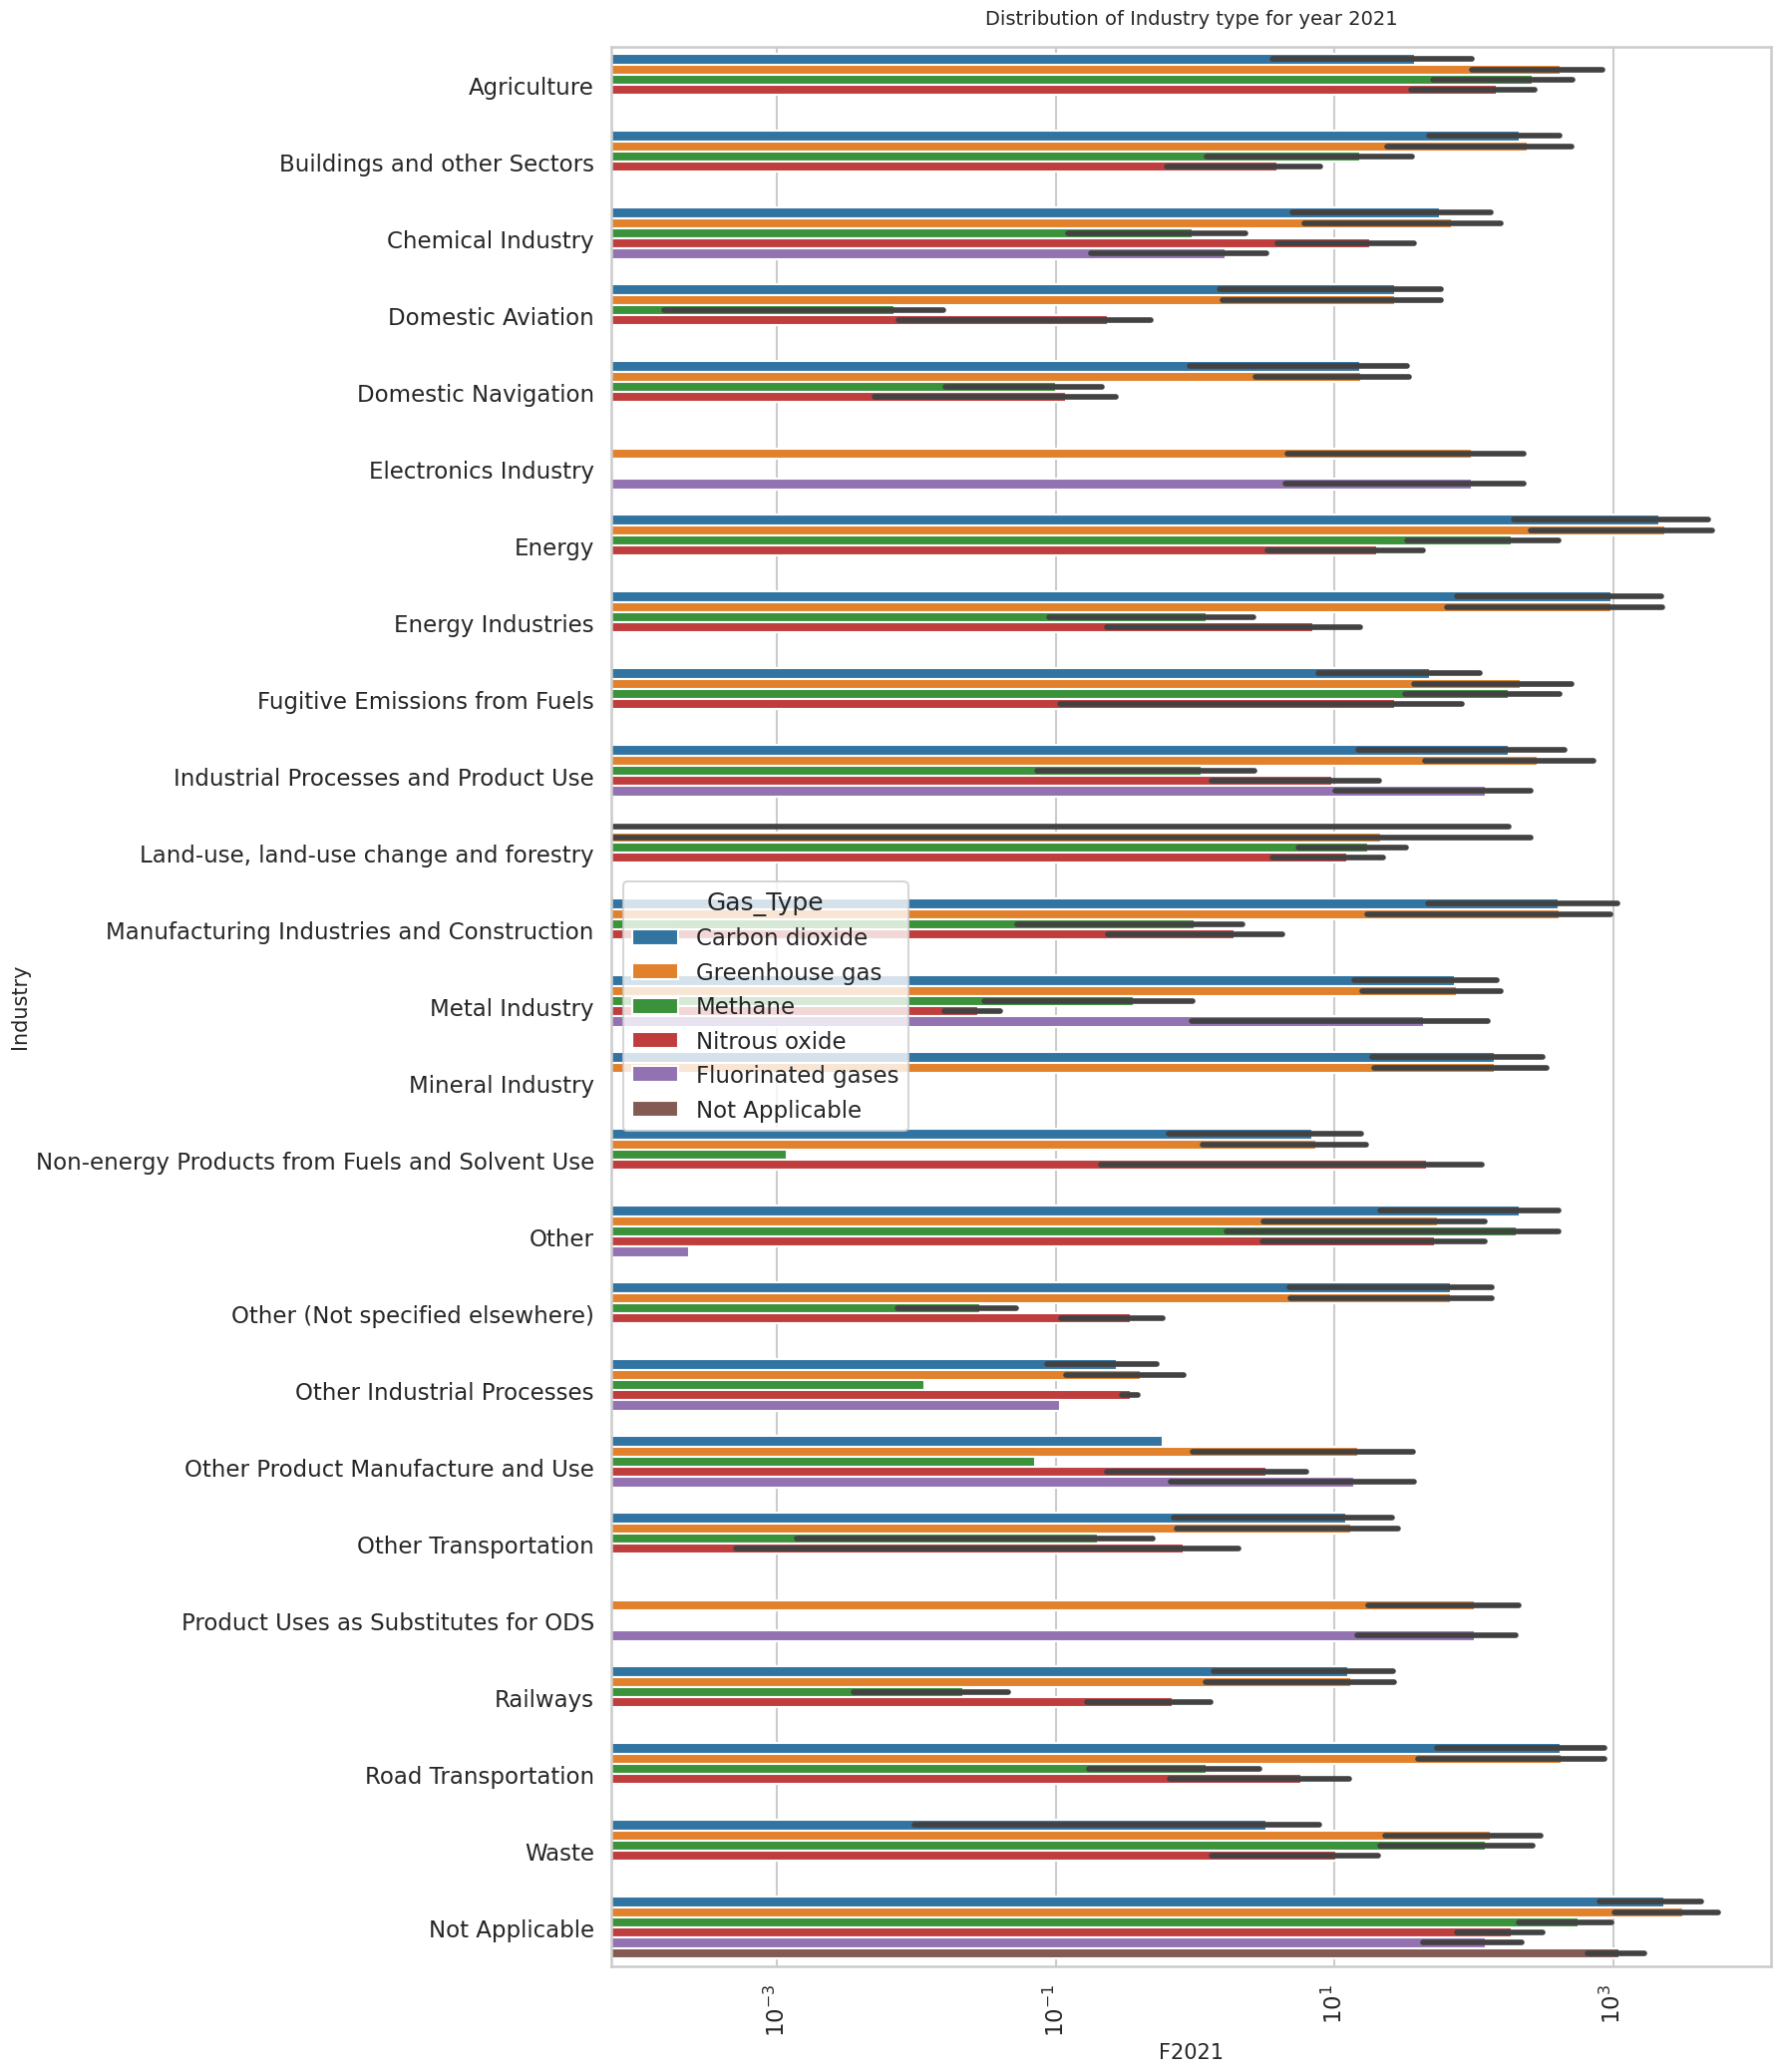

In [19]:
import seaborn as sns
plt.figure(figsize=(15,25))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 16
plt.title("Distribution of Industry type for year 2021")

plt.xticks(rotation=90)
plt.xscale('log')

sns.barplot(data=df, x="F2021", y="Industry", hue="Gas_Type")

Insights

*   Max emission is from Energy production- 10^3: The burning of fossil fuels, such as coal, oil, and natural gas, for electricity generation, heating, and industrial processes is a major source of greenhouse gas emissions. Power plants and energy-intensive industries contribute significantly to carbon dioxide (CO2) emissions.
